

---

## I. Context: RAG-Based Applications and Core Components

The primary goal is to build **Retrieval Augmented Generation (RAG) based LLM applications** using LangChain.

### RAG Overview
RAG is a technique that **combines information retrieval with language generation**. It allows a Language Model (LLM) to retrieve relevant documents from an external knowledge base and use them as context to generate accurate and grounded responses.

*   **Necessity of RAG:** LLMs often fail to answer questions related to current affairs, or private/personal data (e.g., personal emails, company documentation) because they haven't seen that data.
*   **Benefits:** RAG enables access to up-to-date information, provides privacy (as confidential documents are not uploaded to public services like ChatGPT), and manages documents of unlimited size by dividing them into chunks.
*   **Key Components of a RAG Application:** The applications are typically built using four main components:
    1.  **Document Loaders** (Current Focus).
    2.  Text Splits.
    3.  Vector Databases.
    4.  Retrievers.

## II. Document Loaders: Definition and Standardized Format

**Document Loaders** are the first components used in building RAG applications. They are utilities within LangChain responsible for bringing data into the system.

### Function and Standard Output
Document Loaders fetch data from various sources (text files, PDFs, databases, cloud providers) and convert it into a **standardized format** (Document Objects).

All Document Loaders, regardless of the source, return the loaded data as a **list of Document objects**.

### The Document Object Structure
The Document Object is the standardized format used by LangChain. Every Document Object has two components:

1.  **`page_content`**: The actual content of the data.
2.  **`metadata`**: Information surrounding the data, such as the source, creation date, author, or page number.

*(Example Code Snippet for Accessing Document Content)*
```python
# Assuming 'docs' is the list of Document Objects returned by the loader
first_document = docs

# To access the content:
content = first_document.page_content #

# To access the metadata:
metadata = first_document.metadata #
```

## III. Document Loading Methods (Load vs. Lazy Load)

All Document Loaders are found in the `langchain_community.document_loaders` package. They typically expose two distinct loading functions: `load` (Eager Loading) and `lazy_load` (Lazy Loading).

| Feature | `load` Function (Eager Loading) | `lazy_load` Function (Lazy Loading) |
| :--- | :--- | :--- |
| **Loading Method** | Loads everything at once in memory. | Loads documents **on demand**, one at a time. |
| **Return Type** | Returns a **list of Document objects**. | Returns a **generator of Document objects**. |
| **When to Use** | When the number of documents is small or files are small, and everything is needed in memory simultaneously. | When working with a very large number of documents/files, or when stream processing is required without consuming a lot of RAM.

*(Conceptual Code Snippet Demonstrating Lazy Load)*
```python
# Using lazy_load returns a generator
doc_generator = loader.lazy_load() #

# Documents are processed one-by-one, maximizing memory efficiency
for document in doc_generator: #
    # Perform operation (e.g., print metadata, process content)
    print(document.metadata)
    # The document is removed from memory before the next iteration
```

## IV. Core Document Loader Implementations

The four most commonly used document loaders are detailed below:

| Loader Name | Source Type | Key Functionality | Code Insight |
| :--- | :--- | :--- | :--- |
| **`TextLoader`** | Text Files (`.txt`) | The simplest loader; takes text files and converts them into Document objects. | Instantiate with the file path (e.g., `cricket.txt`), optionally specifying `encoding` (e.g., `utf8`). |
| **`PyPDFLoader`** | PDF Files | Converts PDF files into Document objects, working on a **page-by-page basis**. A PDF with N pages yields N Document objects. | Internally uses the `pypdf` library. Requires `pip install pypdf`. Best for PDFs with mostly textual data. |
| **`DirectoryLoader`** | Directory/Folder | Loads **multiple files** (e.g., many PDFs or text files) from a single directory. | Requires three parameters: `path`, a `glob` pattern (e.g., `*.pdf` to pick all PDFs), and the `loader_class` (e.g., `PyPDFLoader`). |
| **`WebBaseLoader`** | Web Pages (URL) | Loads and extracts text content from web pages. Internally uses `requests` and `BeautifulSoup`. | Best for static web pages (blogs, news articles). Can take a single URL or a list of URLs. |
| **`CSVLoader`** | CSV Files | Used to load data from CSV files. | Creates a separate Document object for **every row** in the CSV. The `page_content` is a string representation of the row's column names and values. |

### Alternative PDF Loaders
While `PyPDFLoader` is suitable for textual PDFs, other loaders exist for different scenarios:
*   **`PDFPlumberLoader`**: Used for extracting data from PDFs containing complex table structures.
*   **`UnstructuredPDFLoader`**: Used for processing PDFs containing scanned images.
*   **`AmazonTextractPDFLoader`**: An option for dealing with complex or image-heavy PDFs.

## V. Customization

LangChain allows users to create **custom Document Loaders** if no existing loader is available for a specific data source.

*   This requires creating a class that **inherits from a base loader class**.
*   The custom class must define its own implementation of the `load` function and/or the `lazy_load` function.
*   The vast pool of existing document loaders are largely community-developed and are found in the `langchain_community` package.

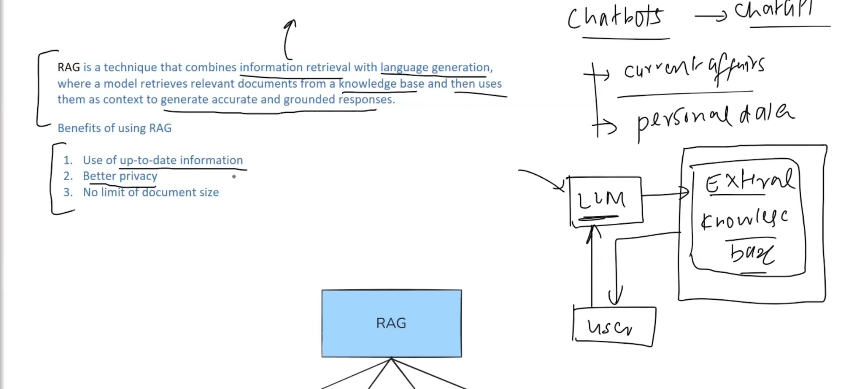

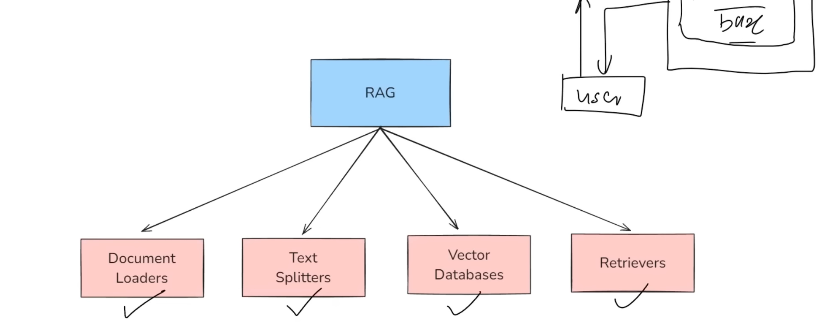

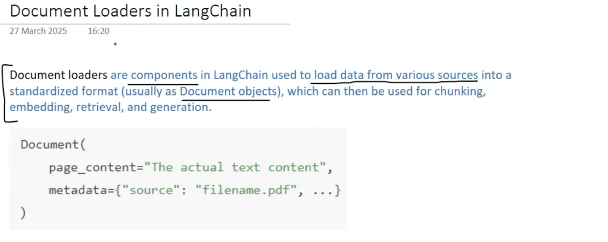

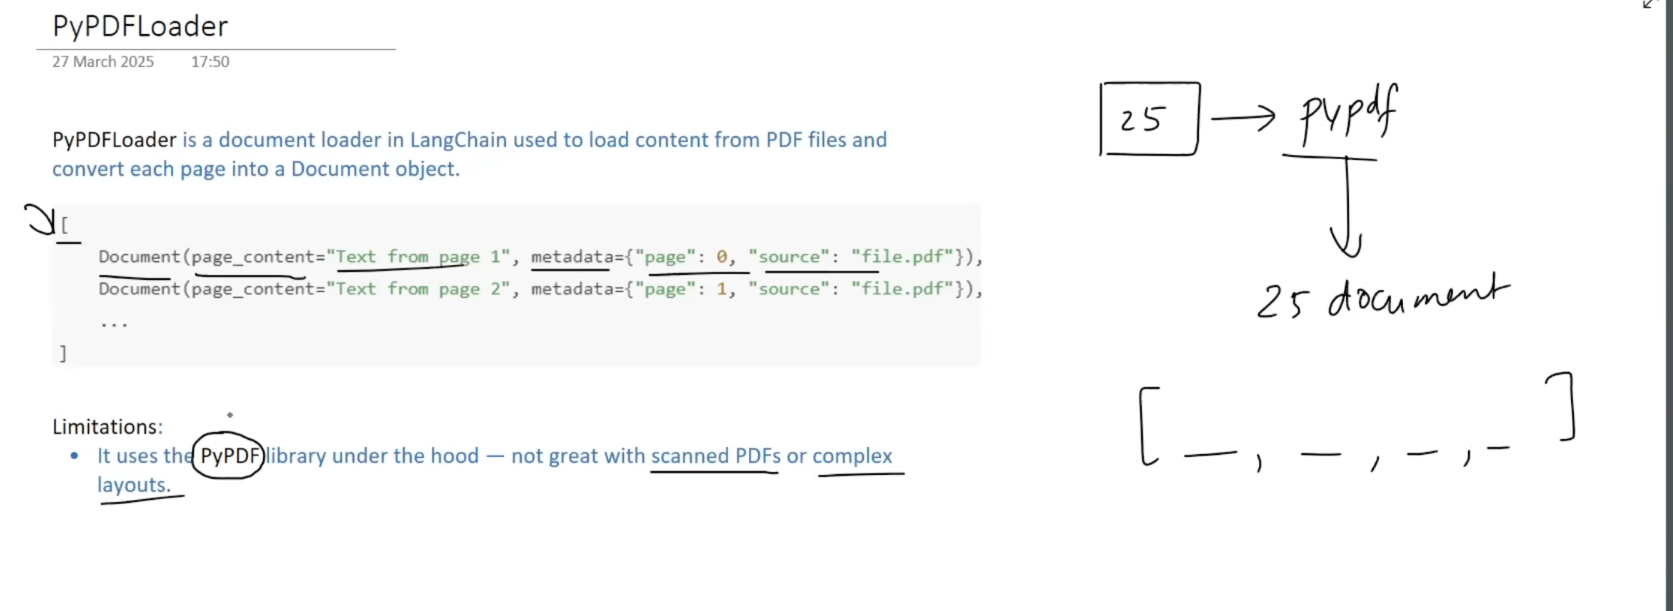



---

# 🧠 **LangChain — Document Loaders (Summary Notes)**

### 📘 Overview

**Document Loaders** are core components of the **LangChain** framework.
They are responsible for **loading documents from various data sources** (PDFs, web pages, text files, CSVs, etc.) and converting them into **Document objects** — a standardized format usable by other LangChain components such as **LLMs, Text Splitters, Vector Stores**, etc.

---

## 🔹 What is a Document Loader?

* Loads data from external sources.
* Converts raw data into **Document objects**.

Each **Document** object contains:

```python
{
  "page_content": "The actual text content",
  "metadata": {"source": "file name, URL, etc."}
}
```

---

## 🔹 Importance in RAG (Retrieval-Augmented Generation)

* In RAG, external data sources are used to augment the LLM’s knowledge.
* Document loaders act as the **data ingestion step**, converting raw files/web pages into usable text chunks.

---

## ⚙️ Types of Document Loaders

### 1. 📝 **Text Loader**

**Used for:** `.txt` files
**Class:** `TextLoader`

**Example:**

```python
from langchain_community.document_loaders import TextLoader

loader = TextLoader("AI_Introduction.txt")
documents = loader.load()
```

**Output:**

* Returns a list of `Document` objects.
* Each has `page_content` and `metadata`.

---

### 2. 📄 **PDF Loader**

**Used for:** `.pdf` files
Different loaders are used based on the PDF type:

| Type of PDF               | Recommended Loader                                   |
| ------------------------- | ---------------------------------------------------- |
| Simple, clean PDF         | `PyPDFLoader`                                        |
| PDFs with tables/columns  | `PDFPlumberLoader`                                   |
| Scanned/image PDFs        | `UnstructuredPDFLoader` or `AmazonTextractPDFLoader` |
| Layout/image data needed  | `PyMuPDFLoader`                                      |
| Best structure extraction | `UnstructuredPDFLoader`                              |

**Example:**

```python
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("AI_Introduction.pdf")
documents = loader.load()
```

---

### 3. 🌐 **Web Page Loader**

**Used for:** Loading content from websites
**Class:** `WebBaseLoader`
**Libraries used:** `requests`, `BeautifulSoup4`

**Example:**

```python
from langchain_community.document_loaders import WebBaseLoader

url = "https://medium.com/@mangeshsalunke1309/list/generative-ai-langchain-fca1591f6e98"
loader = WebBaseLoader(url)
documents = loader.load()
```

**Limitations:**

* Only static pages are loaded (no JavaScript-rendered content).
* HTML structures like tables/headings/lists become plain text.

---

### 4. 📁 **Directory Loader**

**Used for:** Loading multiple files from a directory
**Class:** `DirectoryLoader`

**Example:**

```python
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import PyPDFLoader

loader = DirectoryLoader(
    "Data Folder/",
    glob="**/*.pdf",
    loader_cls=PyPDFLoader,
    show_progress=True
)
documents = loader.load()
```

**Features:**

* Loads all files in a directory (supports nested folders).
* Can filter specific file types using `glob`.
* Uses `UnstructuredLoader` by default (handles PDF, HTML, Markdown, etc.).

---

## 🧩 Summary Table

| Loader Type      | Class                                   | Source Type    | Notes                     |
| ---------------- | --------------------------------------- | -------------- | ------------------------- |
| Text Loader      | `TextLoader`                            | `.txt` files   | Simple plain text         |
| PDF Loader       | `PyPDFLoader`, `PDFPlumberLoader`, etc. | `.pdf` files   | Choose based on structure |
| Web Loader       | `WebBaseLoader`                         | Web pages      | Static content only       |
| Directory Loader | `DirectoryLoader`                       | Multiple files | Supports filters via glob |

---

## 🏁 **Conclusion**

* Document Loaders are essential for bringing external data into LangChain.
* They produce standardized `Document` objects.
* Used extensively in **RAG** systems and **data preprocessing** before embedding/vectorization.
* Explore other loaders in LangChain docs based on your data format needs.

---


